# Running this notebook
`bazel build lib/Metrics:jupyter && ./bazel-bin/lib/Metrics/jupyter`

# L-estimators
Source: https://en.wikipedia.org/wiki/L-estimator

An L-estimator is a linear combination of order statistics of the measurements.
L-estimators are simple and robust, thus they are easy to compute and interpret. They can however be too simplistic for modern applications and are mostly used for initial estimations.

## Summary Statistics
### Median
It is a robust approximation of the mean and is independant of any distance metric.
In fact it is the most resistant statistic, as it gives a good approximation as long as 50% of the data is correct.

In [7]:
from lib.Metrics.L_estimators import median, median_absolute_deviation, interquartile_range, Q1, Q, S, is_outlier
import inspect

print(inspect.getsource(median))

def median(data: list):
    assert len(data) > 0, "List is empty"
    if len(data) == 1:
        return data[0]
    
    data = sorted(data)
    mid_index = len(data) // 2
    if len(data) % 2 == 1:
        return data[mid_index]
    else:
        return 0.5 * (data[mid_index - 1] + data[mid_index]) 



## Measures of scale / dispertion

### Median Absolute Deviation
Source: https://en.wikipedia.org/wiki/Median_absolute_deviation

It is a robust (= works well for a wide range of distributions, including not normal ones) measure of variability.
If we have:
- Elements of the dataset $X_i$
- Whole dataset $X$
We compute it as $$MAD = median(|X_i - median(X)|)$$
In words, it is the median of the absolute deviations from the data's median.

In [8]:
print(inspect.getsource(median_absolute_deviation))

def median_absolute_deviation(data: list):
    median_data = median(data)
    residuals_from_median = [abs(x_i - median_data) for x_i in data]
    return median(residuals_from_median)



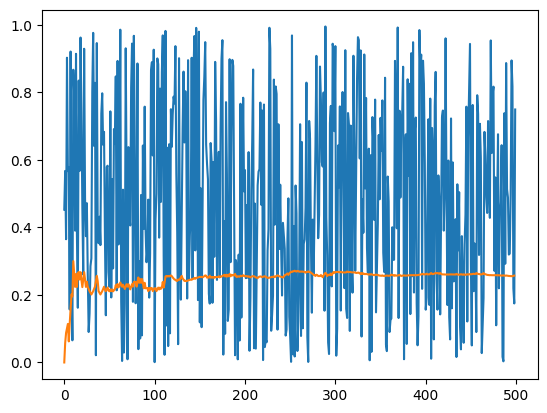

In [9]:
from random import random
import matplotlib.pyplot as plt

data = [random() for _ in range(500)]

plt.figure()
plt.plot(data)
plt.plot([median_absolute_deviation(data[:i]) for i in range(1, len(data))])
plt.show()

### Interquartile range
It is defined as the difference between the 75th and 25th quartiles of the data: $$IQR = Q_3 - Q_1$$.

It is a trimmed estimator, ie it has a 25% trimmed range and thus a 25% breakdown point.

#### Detecting outliers
Measurements $\{x | x \lt Q_1 - 1.5 IQR || x \gt Q_3 + 1.5 IQR\}$ can be considered outliers.

In [10]:
print(inspect.getsource(median_absolute_deviation))

def median_absolute_deviation(data: list):
    median_data = median(data)
    residuals_from_median = [abs(x_i - median_data) for x_i in data]
    return median(residuals_from_median)



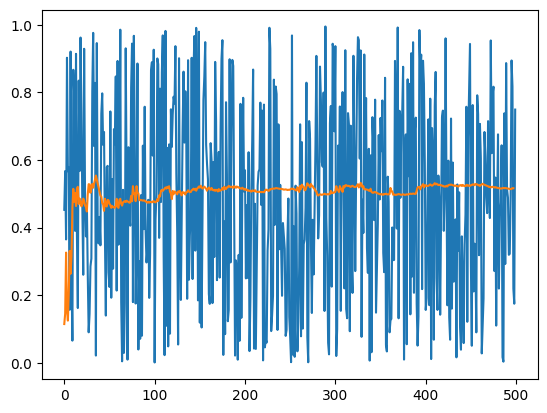

In [11]:
plt.figure()
plt.plot(data)
plt.plot([interquartile_range(data[:i]) for i in range(2, len(data))])
plt.show()

### Absolute Pairwise Differences
The MAD has two weaknesses:
- It is ineficient at Gaussian distributions
- It computes a symetric statistic about a location estimate, thus not dealing with skewness.

Two alternative statistics based on pairwise differences are:
- $S = 1.1926 \times med_i(|med_j(x_i - x_j)|$
- $Q = c_n \times Q1(|x_i - x_j| : i < j)$

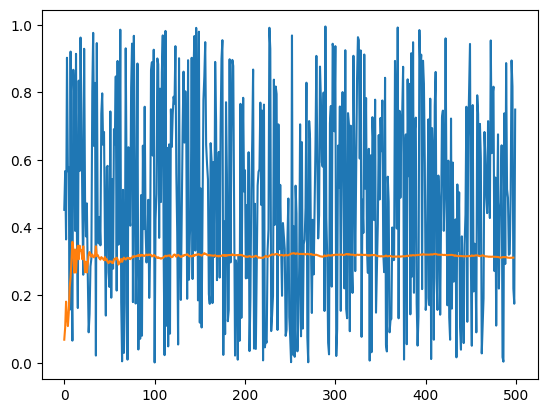

In [12]:
plt.figure()
plt.plot(data)
plt.plot([S(data[:i]) for i in range(2, len(data))])
plt.show()

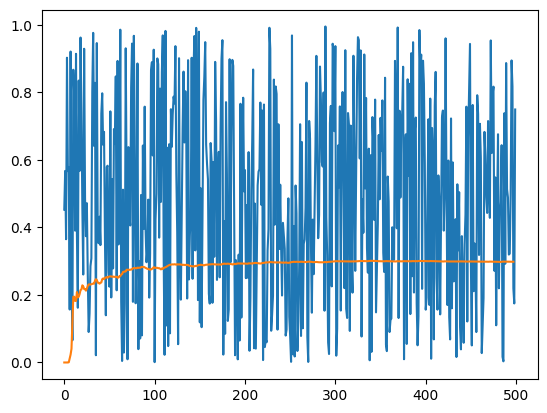

In [13]:
plt.figure()
plt.plot(data)
plt.plot([Q(data[:i]) for i in range(2, len(data))])
plt.show()

# Multivariate Statistics
## Summary Statistics
### Geometric Median
See notebook.

## Variability
### Median of Distances to Geometric Median (MADGM)
It is the generalization of the MAD.

In [12]:
Q1(data)

0.27520267873637083

# M-Estimators
Source: https://en.wikipedia.org/wiki/M-estimator

M-estimators are a class of extremum estimators (ie they estimate by maximizing a cost function), for which the cost function is a sample average.

More generally, M-estimators can be defined to be a zero of an estimating function. This function can be the derivative of another statistical function.

## Examples

### Least Squares
Source: https://en.wikipedia.org/wiki/Least_squares

Least squares is an approach to approximating the solution of overdetermined systems by minimizing the sum of the squares of the residuals. That makes it an M-estimator.

Least squares problems fall in two different categories:
- Ordinary Least Squares, when the residuals are linear in all unknowns. It has a closed-form solution.
- Non-linear Least Squares, when the residuals are not linear. It can be solved by approximating the system as a linear one over small iterations.

#### Problem Statement
The objective consists of adjusting the parameters of a model function to best fit a dataset. To illustrate, we can choose a dataset of $n$ points $(x_i, y_i)$ where $x_i$ is an independent variable and $y_i$ a dependent variable. The model function is $f(x, \beta)$, where the $m$ adjustable parameters are held by $\beta$. From this, we define the residual as $r_i = y_i - f(x_i, \beta)$. 
We want to minimize the sum of squared residuals $S = \sum_{i = 1}^{n} r_i^2$.

#### Ordinary Least Squares
##### Linear regression
Let the data be $n$ observations $\{x_i, y_i\}$, ie each obseervation i includes a scalar response $y_i$ from a column vectoor $x_i$ of $p$ parameters. In a simple line estimation problem, $p=1$.

In a linear regression model, the response variable $y_i$ is a linear function of the regressors: $$y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} + \epsilon_i$$ or in vector form $$y_i = x_i^T \beta + \epsilon_i$$

Consider an overdetermined system $\sum_{j = 1}^{p} X_i^j \beta_j = y_i | i = 1,2,..,n$, of $n$ linear equations in $p$ unkwnown coefficients with $n > p$. For a linear model as above, the first column of $X$ contains only onnes, the other columns contain actual data. So here $p$ is equal to the number of regressors plus one. We can write this as $X \beta = y$.

Such a system has usually no extact solution, so the goal is to find the coefficients $\beta$ which fit the equations best, ie minimizing an objective function $$S(\beta) = ||y - X\beta||^2$$.

This minimization problem has a unique solution, as long as the $p$ columns of the matrix $X$ are linearly independant. This solution is given by solving the normal equations $(X^TX)\hat{\beta} = X^Ty$.

We then get $$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [13]:
from lib.Metrics.M_estimators import ordinary_least_squares
print(inspect.getsource(ordinary_least_squares))

def ordinary_least_squares(data_y, degree):
    """
    Considering equations y = beta_degree * x **degree + ... + beta_0 * x **0,
    estimate the vector of betas.
    """
    size = len(data_y) #number of data points
    p = degree + 1 # degree 0 = 1 constant regressor
    data_x = [x for x in range(size)]
    X = make_vandermonde(data_x, p)     # Build the n x p X matrix
    beta = (np.linalg.inv(X.T @ X) @ X.T) @ data_y # Highly ineficient for large matrices
    return beta



Estimated pitch: 1.1946164504293266 degrees


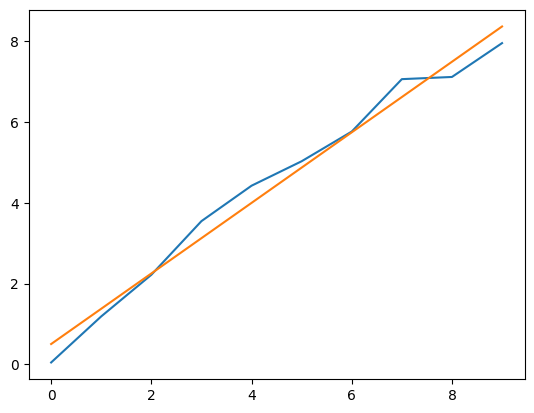

In [15]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

plane_pitch = 1.2 # degrees
size = 10
data_y = np.array([np.arctan(plane_pitch) * x + random() for x in range(size)])
beta = ordinary_least_squares(data_y, degree=1)
print(f"Estimated pitch: {np.tan(beta[0])} degrees")

data_x = np.array([x for x in range(len(data_y))])
estimated_y = [beta[0] * x + beta[1]  for x in data_x]
plt.plot(data_x, data_y)
plt.plot(data_x, estimated_y)

In [1]:
from lib.Metrics.example import do_something
do_something()

42


### Maximum Likelihood Estimation
